
#### Importing Libraries

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

![kneeding](https://media.giphy.com/media/RpckSiHL6ZaXS/giphy.gif)

# Enhancing Regression Models

Objectives, be able to use:

Pre-processing:
- handling non-numeric data
 - ordinal: label encoder
 - categorical: one-hot-encoder (which do you drop?)
 - binary encoder
- Scaling

Creating New:
- Interaction terms
- Polynomials
- combinations of other variables

Evaluating:
- R^2 vs adjusted R^2
- AIC
- BIC
- comparing model performance metrics - metrics going up or down?


## Scenario: car seat sales

Description: simulated data set on sales of car seats<br>
Format: 400 observations on the following 11 variables
- Sales: unit sales at each location
- CompPrice: price charged by nearest competitor at each location
- Income: community income level
- Advertising: local advertising budget for company at each location
- Population: population size in region (in thousands)
- Price: price charged for car seat at each site
- ShelveLoc: quality of shelving location at site (Good | Bad | Medium)
- Age: average age of the local population
- Education: education level at each location
- Urban: whether the store is in an urban or rural location
- USA: whether the store is in the US or not

 We will attempt to predict ${\tt Sales}$ (child car seat sales) in 400 locations based on a number of predictors.

#### Task
Before looking at the data, brainstorm with your neighbor which four variables you think *might* be related to sales.

In [2]:
df2 = pd.read_csv('Carseats.csv')
df2.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US             400 non-null object
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
# looking for co-variance
import seaborn as sns
sns.set()
# sns.pairplot(df2)

In [5]:
df2.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


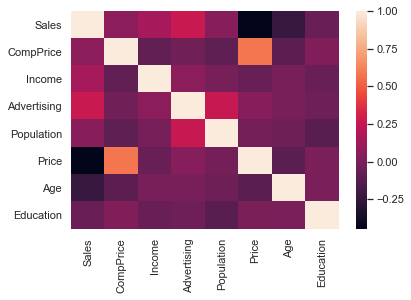

In [6]:
sns.heatmap(df2.corr());

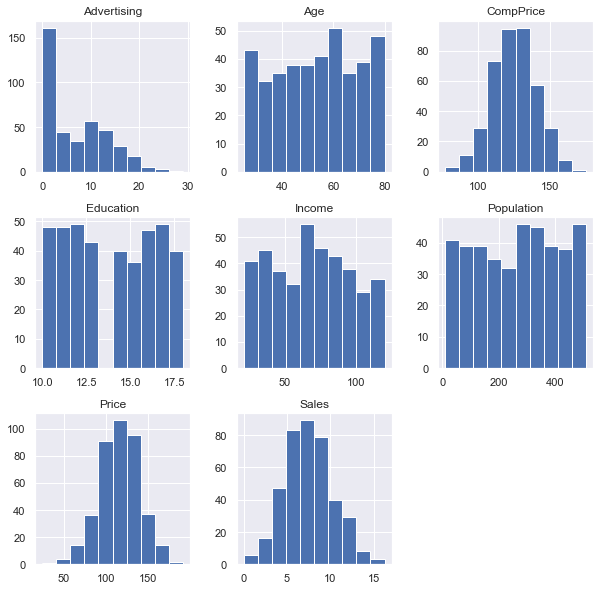

In [7]:
# look at distributions of variables
df2.hist(figsize=(10,10));
# look for distribution
# look for skewe
# in order to fix skewe, log transformation 
# right skewe can possibly be fixed by a log transformation

In [8]:
df2 = pd.read_csv('Carseats.csv')
df2.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


The ${\tt Carseats}$ data includes qualitative predictors such as ${\tt Shelveloc}$, an indicator of the quality of the shelving location—that is, the space within a store in which the car seat is displayed—at each location. The predictor ${\tt Shelveloc}$ takes on three possible values, ${\tt Bad}$, ${\tt Medium}$, and ${\tt Good}$.

Given a qualitative variable such as ${\tt Shelveloc}$, Python generates dummy variables automatically. Below we fit a multiple regression model that includes some interaction terms.

In [9]:
# want our formula to have names of all columns 
# so make a list that takes all the columns except for sales, because thats what we are comparing everything against

In [10]:
# x_vars = list(df2.columns[df2.columns!='Sales'])
# model = smf.ols(formula, df2)
# results = model.fit()
# results.summary()

In [11]:
x_vars=list(df2.columns[df2.columns!='Sales'])

In [36]:
model = smf.ols(formula, df2)
results = model.fit()

PatsyError: Error evaluating factor: NameError: name 'Good' is not defined
    Sales ~CompPrice+Income+Advertising+Population+Price+Age+Education+Urban+US+Good+Medium
                                                                                ^^^^

In [37]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Wed, 25 Sep 2019   Prob (F-statistic):          1.60e-166
Time:                        13:23:32   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.5284      0.135     55.751      0.000       7.263       7.794
Urban[T.Yes]     0.1229      0.113      1.088      0.277      -0.099       0.345
US[T.Yes]       -0.1841      0.150     -1.229      0.220      -0.479       0.111
CompPrice        1.4215      0.064     22.378      0.000       1.297       1.546
Income           0.4417      0.052      8.565      0.000       0.340       0.543
Advertising      0.8176      0.074     11.066      0.000       0.672       0.963
Population       0.0306      0.055      0.561      0.575      -0.077       0.138
Price           -2.2549      0.063    -35.700      0.000      -2.379      -2.131
Age             -0.7450      0.051    -14.472      0.000      -0.846      -0.644
Education       -0.0552      0.052     -1.070      0.285      -0.157       0.046
Good             1.9841      0.063     31.678      0.000       1.861       2.107
Medium           0.9739      0.063     15.516      0.000       0.851       1.097
==============================================================================
Omnibus:                        0.811   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.667   Jarque-Bera (JB):                0.765
Skew:                           0.107   Prob(JB):                        0.682
Kurtosis:                       2.994   Cond. No.                         5.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
results.rsquared

NameError: name 'results' is not defined

In [25]:
from sklearn.preprocessing import OneHotEncoder
df2_one_hot = df2
# first, select categorical variables
onehot_cat = df2_one_hot.select_dtypes(include='object')
onehot_cat
onehot_num = df2_one_hot.select_dtypes(exclude='object')
onehot_num.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
0,9.50,138,73,11,276,120,42,17
1,11.22,111,48,16,260,83,65,10
2,10.06,113,35,10,269,80,59,12
3,7.40,117,100,4,466,97,55,14
4,4.15,141,64,3,340,128,38,13


In [26]:
# instatnate an instance
ohc = OneHotEncoder(sparse=False)
ohc.fit(df2_one_hot[['ShelveLoc']])
ohc_transform = pd.DataFrame(ohc.transform(df2_one_hot[['ShelveLoc']]))
ohc_transform.head()

,0,1,2
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [27]:
# this is saying that bad, good, medium are related to 0, 1, 2
new_names = ohc.categories_[0]
ohc_transform.columns = new_names
ohc_transform.head()
# we do this because we wanted to see all three columns within the ShelveLoc, where .summary() cut out 'bad'

,Bad,Good,Medium
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [28]:
ohc_2columns = ohc_transform.drop(columns = 'Bad')
ohc_2columns

df_final_onehot = pd.concat([df2_one_hot, ohc_2columns], axis=1).drop(['ShelveLoc'], axis=1)
df_final_onehot.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,Good,Medium
0,9.50,138,73,11,276,120,42,17,Yes,Yes,0.0,0.0
1,11.22,111,48,16,260,83,65,10,Yes,Yes,1.0,0.0
2,10.06,113,35,10,269,80,59,12,Yes,Yes,0.0,1.0
3,7.40,117,100,4,466,97,55,14,Yes,Yes,0.0,1.0
4,4.15,141,64,3,340,128,38,13,Yes,No,0.0,0.0


In [29]:
# now we want to get our model
# have to use 'num1' and 'num2' for the column names i guess? 
# the r**2, AIC, and BIC ended up being the exact same number
# we are doing this just to show the process of what the function does....will not have to do this in the future 


x_vars2 = list(df_final_onehot.columns[df_final_onehot.columns!='Sales'])


# this is the template to use above 
# x_vars = list(df2.columns[df2.columns!='Sales'])
#model = smf.ols(formula, df2)
#results = model.fit()
#results.summary()

In [30]:
from sklearn.preprocessing import LabelEncoder, Binarizer

In [31]:
# SCALING
# going to put all of our variables on the same scale
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# StandardScaler - normalizes the mean, puts the mean on zero and one STD is 1 and -1
# Classification models - k-NN
# Scaling does not impact R**2

df_standard = df_final_onehot
numerical_data = df_standard.select_dtypes(exclude='object')
numerical_data.drop('Sales', axis = 1, inplace=True)
numerical_data.head()

/Users/logananderson/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,CompPrice,Income,Advertising,Population,Price,Age,Education,Good,Medium
0,138,73,11,276,120,42,17,0.0,0.0
1,111,48,16,260,83,65,10,1.0,0.0
2,113,35,10,269,80,59,12,0.0,1.0
3,117,100,4,466,97,55,14,0.0,1.0
4,141,64,3,340,128,38,13,0.0,0.0


In [32]:
scaler = StandardScaler()
scaler.fit_transform(df_standard[['CompPrice']])
# This standered scaled the compprice, with a mean of 0 

for feature in list(numerical_data):
    scaler = StandardScaler()
    df_standard[feature] = scaler.fit_transform(df_standard[[feature]])
    
df_standard.head()
# now all of the features are in standard scale!

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,Good,Medium
0,9.50,0.850455,0.155361,0.657177,0.075819,0.177823,-0.699782,1.184449,Yes,Yes,-0.519462,-1.099975
1,11.22,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,0.721723,-1.490113,Yes,Yes,1.925067,-1.099975
2,10.06,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.350895,-0.725953,Yes,Yes,-0.519462,0.909112
3,7.40,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.103677,0.038208,Yes,Yes,-0.519462,0.909112
4,4.15,1.046337,-0.166631,-0.547271,0.510625,0.516132,-0.947000,-0.343872,Yes,No,-0.519462,-1.099975


In [33]:
x_vars3 = df_standard.drop('Sales', axis=1)
formula = 'Sales ~' + '+'.join(list(x_vars3))
model = smf.ols(formula, data=df_standard)
results = model.fit()
results.summary()
# Standard Scaler only impacts euclidean distance models
# coefficients are going to look different, but the metrics are going to be the same because we scaled them 
# Euclidean distance or Euclidean metric is the "ordinary" straight-line distance between two points in Euclidean space

# you can log transform feature to impact skewe 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Wed, 25 Sep 2019   Prob (F-statistic):          1.60e-166
Time:                        13:23:22   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.5284      0.135     55.751      0.000       7.263       7.794
Urban[T.Yes]     0.1229      0.113      1.088      0.277      -0.099       0.345
US[T.Yes]       -0.1841      0.150     -1.229      0.220      -0.479       0.111
CompPrice        1.4215      0.064     22.378      0.000       1.297       1.546
Income           0.4417      0.052      8.565      0.000       0.340       0.543
Advertising      0.8176      0.074     11.066      0.000       0.672       0.963
Population       0.0306      0.055      0.561      0.575      -0.077       0.138
Price           -2.2549      0.063    -35.700      0.000      -2.379      -2.131
Age             -0.7450      0.051    -14.472      0.000      -0.846      -0.644
Education       -0.0552      0.052     -1.070      0.285      -0.157       0.046
Good             1.9841      0.063     31.678      0.000       1.861       2.107
Medium           0.9739      0.063     15.516      0.000       0.851       1.097
==============================================================================
Omnibus:                        0.811   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.667   Jarque-Bera (JB):                0.765
Skew:                           0.107   Prob(JB):                        0.682
Kurtosis:                       2.994   Cond. No.                         5.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

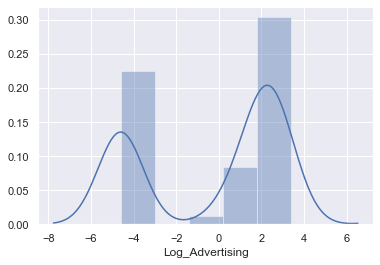

In [41]:
df2_log = df2
df2['Log_Advertising'] = np.log(df2_log['Advertising'] + .01)
sns.distplot(df2['Log_Advertising'])
# df2['Log_Advertising']

In [35]:
# Interactions - if you multiply two features together, their product will have a different effect (the ':' does or represents this)
# Interaction features will cross, while addative featues will be parallel 

In [101]:
from itertools import combinations

# to get this data right, df2 needs to be clean and not ran with the log features

df_combo = df2
numerical = df2.select_dtypes(exclude='object').drop('Sales', axis=1)

list(numerical)
combos = combinations(list(numerical), 2)

# want to test the imacts each combo has on r**2

for combo in combos:
    interaction = (':'.join(combo))
    
    formula2 = 'Sales ~ ' + '+'.join(list(numerical) + '+' + interaction)
    model = smf.ols(formula2, data=df_combo)
    results = model.fit()
    print(results.rsquared)


TypeError: can only concatenate list (not "str") to list

#### Task 
Again, with your neighbor:
- What issues do you see with this model?
- What would you change?

To learn how to set other coding schemes (or _contrasts_), see: http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/contrasts.html

In [ ]:
# Adding a ton of features/polynomials causes a problem...a tradeoff...'overfitting' or !!! bias varaince tradeoff!!! 

### Polynomials

![polynomials](https://sc.cnbcfm.com/applications/cnbc.com/resources/files/2015/12/11/emotionandincome-01_0.png)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import BinaryEncoder

In [ ]:
from sklearn.preprocessing import PolynomialFeature

`medv ~ lstat + np.square(lstat)`

In [ ]:
from sklearn.preprocessing import StandardScaler

### Evaluating
#### Using `statsmodels`

![albon2](./img/aic-albon.png)

**AIC**: The Akaike Information Criterion. Adjusts the log-likelihood based on the number of observations and the complexity of the model.


**BIC**:	The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more parameters.

Want to be lower. Lower is better.

`results.aic`<br>
`results.bic`

![r-sqared](https://qph.fs.quoracdn.net/main-qimg-b932057f732059158062cf0ad9c1719f.webp)

![adj-r-sqr](https://i.stack.imgur.com/BTGK6.png)

`results.rsquared()`<br>
`results.rsquared_adj()`
